<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_6/6_1_Part2_functions_and_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Here we are presented a dataset of loans from Fico, we need to transform and clean the data as well as automate some of our analysis. 


---



# Part 2 -  Functions 


---


Functions are **blocks of reusable code that perform a specific task**. They are a fundamental concept in programming and allow us to write code that is more organized, efficient, and easier to read.

In Python, you can define a function using the `def` keyword, followed by the function name, and then the parameters (if any) enclosed in parentheses. Here's an example of a simple function that takes in two arguments, adds them together, and returns the result:

```python
def add_numbers(x, y):
    return x + y

x = 3
y = 5
result = add_numbers(x, y)
print("the result of add_numbers(x={}, y={}) is {} ".format(x,y,result))

```


In [4]:
def add_numbers(x, y):
    return x + y

x = 3
y = 5
result = add_numbers(x, y)
print("the result of add_numbers(x={}, y={}) is {} ".format(x,y,result))
result = add_numbers(7, 10)
print("the result of add_numbers() is {} ".format(x,y,result))
add_numbers(7, 10)
add_numbers(10, 10)
add_numbers(27, 10)

the result of add_numbers(x=3, y=5) is 8 
the result of add_numbers() is 3 


37

## Import libraries 


---



In [6]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline

## Import Data


---



In [7]:
faang = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_6/data/faang_salary_over_200k.csv")
faang.head()

loans = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_6/data/loans_updated.csv")
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,NaN,Sep-16,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,NaN,Sep-16,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,NaN,Sep-16,719.0,715.0,0.0,NaN,1.0,INDIVIDUAL
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,NaN,Apr-16,604.0,600.0,0.0,NaN,1.0,INDIVIDUAL
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,Sep-16,67.79,Oct-16,Sep-16,694.0,690.0,0.0,NaN,1.0,INDIVIDUAL


In [8]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'a

# Practical Functions & Cleaning Data


---

In data science / analtyics Functions are used in data to transform data in a Pandas DataFrame and to automate our analysis.

- Transforming data in a Pandas DataFrame is a key part of data preprocessing and cleaning. Functions can be used to perform complex transformations on data, such as aggregating values, computing summary statistics, and converting between data types. By encapsulating this logic in a function, you can make your code more modular and reusable.
  - `apply()`
    - `apply(lambda x: )`
  - `replace()`
  - `map()`

- Automating code and logic is also an important part of data science and analytics, especially when working with large datasets. Functions can be used to automate repetitive tasks, such as loading data, performing calculations, and generating visualizations. By automating these tasks, you can save time and reduce the risk of errors in your code.



**Really? is that all?**
> Yep. that's really all there is to it. 


In this notebook we are going to dive into transforming & cleaning data in our panda's data frame and automating our analysis. 



# Recipe for Modifying / Transforming Data in Pandas  


---

One use of functions is to modify, clean or transform data in a panda's data frame. To do this we use the `.apply()` function, 

## Apply Function: apply()

- The `.apply()` function in Pandas allows you to "apply" a function to each row or column of a DataFrame. You can use this function to modify the values in a column based on some calculation. Here's an example that converts temperature from Fahrenheit to Celsius:

```python
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({'City': ['New York', 'Los Angeles', 'Chicago'],
                   'Temperature': [75, 80, 68]})

# Define a function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(temp):
    return (temp - 32) * 5/9

# Apply the function to the 'Temperature' column
df['Temperature'] = df['Temperature'].apply(fahrenheit_to_celsius)

# Print the modified dataframe
print(df)

```
## .apply(lambda x: ...) Lambda functions 

Lambda functions, also known as **anonymous functions**, are a type of function in Python that can be defined in a single line of code without a name. Lambda functions are often used when you need to define a simple function that is only used once. For example suppose i just want to square a number in a column:

```python
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({'numbers': [1, 2, 3, 4, 5]})

# Use a lambda function to square each number in the 'numbers' column
df['squared_numbers'] = df['numbers'].apply(lambda x: x**2)

# Print the modified dataframe
print(df)

```
This code creates a DataFrame with a numbers column containing a list of numbers. It then uses a lambda function with the apply() function to square each number in the numbers column and create a new column called squared_numbers.


### How about a more complex example:

```python
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({'numbers_1': [1, 2, 3, 4, 5],
                   'numbers_2': [6, 7, 8, 9, 10]})

# Use a lambda function to add the values in the 'numbers_1' and 'numbers_2' columns
df['sum'] = df.apply(lambda row: row['numbers_1'] + row['numbers_2'], axis=1)

# Print the modified dataframe
print(df)
```
This code creates a DataFrame with two columns (numbers_1 and numbers_2). It then uses a lambda function with the apply() function to add the values in the `numbers_1` and `numbers_2` columns and create a new column called `sum`. 

>Note: the axis=1 parameter to apply the lambda function **row-wise** instead of **column-wise**.


In [10]:
# Create a sample dataframe
df = pd.DataFrame({'City': ['New York', 'Los Angeles', 'Chicago'],
                   'Temperature': [75, 80, 68]})

# Define a function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(temp):
    return (temp - 32) * 5/9

# Apply the function to the 'Temperature' column
df['Temperature_celsius'] = df['Temperature'].apply(fahrenheit_to_celsius)

# Print the modified dataframe
df

,City,Temperature,Temperature_celsius
0,New York,75,23.888889
1,Los Angeles,80,26.666667
2,Chicago,68,20.000000


In [11]:
# Create a sample dataframe
df = pd.DataFrame({'numbers': [1, 2, 3, 4, 5]})

# Use a lambda function to square each number in the 'numbers' column
df['squared_numbers'] = df['numbers'].apply(lambda x: x**2)

# Print the modified dataframe
df

,numbers,squared_numbers
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


In [12]:

# Create a sample dataframe
df = pd.DataFrame({'numbers_1': [1, 2, 3, 4, 5],
                   'numbers_2': [6, 7, 8, 9, 10]})

# Use a lambda function to add the values in the 'numbers_1' and 'numbers_2' columns
df['sum'] = df.apply(lambda row: row['numbers_1'] + row['numbers_2'], axis=1)

# Print the modified dataframe
df

,numbers_1,numbers_2,sum
0,1,6,7
1,2,7,9
2,3,8,11
3,4,9,13
4,5,10,15


# Back to our Loan Data 


---

Over the next several code blocks we are going to perform a number of tasks using functions. 

1. clean up int_rate column and retun it as a number
2. clalculate the change in fico scores: last_fico_range_high	last_fico_range_low	
3. calculate monthly payment pct of monthly income 




## 1. clean up int_rate column and retun it as a number



---

The interest rate column is a character column containing the rate and a % sign, for example "10.65%" we want to return this as a number in the format of 0.1065 instead of the formated variable. 

> NOTE: there are a dozen ways to do this in python this is an easier one


Next  we are going to use two approaches:
1. apply a function to our column 
  - here we need to define a function first then apply it
2. apply a lambda functio to our column. 
  - here we simply apply the function directly using lambda
3. finally, make a histogram of the new interest_rate column. 





In [16]:
loans["int_rate"].dtypes

dtype('O')

In [17]:
# base code 
rate_string = "10.65%"
rate_float = float(rate_string.strip('%')) / 100
rate_float

0.1065

In [18]:
# get function working 
def convert_interest_rate():
  rate_string = "10.65%"
  rate_float = float(rate_string.strip('%')) / 100
  return rate_float

convert_interest_rate()

0.1065

In [19]:

# first get your function working
def convert_interest_rate(rate_string):
    rate_float = float(rate_string.strip('%')) / 100
    return rate_float

convert_interest_rate("10.65%")  

0.1065

In [20]:
# Define the convert_interest_rate() function
def convert_interest_rate(rate_string):
    rate_float = float(rate_string.strip('%')) / 100
    return rate_float

# Use apply() with the convert_interest_rate() function to convert the 'int_rate' column to floats
loans['interest_rate_1'] = loans['int_rate'].astype(str).apply(convert_interest_rate)

loans[['int_rate','interest_rate_1']].head(10)

,int_rate,interest_rate_1
0,10.65%,0.1065
1,15.27%,0.1527
2,15.96%,0.1596
3,13.49%,0.1349
4,12.69%,0.1269
5,7.90%,0.0790
6,15.96%,0.1596
7,18.64%,0.1864
8,21.28%,0.2128
9,12.69%,0.1269


In [21]:
# Use apply() with a lambda function to convert the 'int_rate' column to floats and create a new column 'interest_rate_2'
loans['interest_rate_2'] = loans['int_rate'].astype(str).apply(lambda x: float(x.strip('%')) / 100)
loans[['int_rate','interest_rate_1','interest_rate_2' ]].head()

,int_rate,interest_rate_1,interest_rate_2
0,10.65%,0.1065,0.1065
1,15.27%,0.1527,0.1527
2,15.96%,0.1596,0.1596
3,13.49%,0.1349,0.1349
4,12.69%,0.1269,0.1269


<AxesSubplot:xlabel='interest_rate_1', ylabel='Count'>

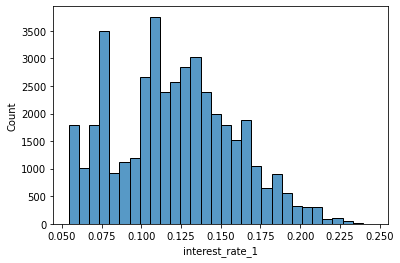

In [22]:
# base plotting code. 
sns.histplot(data=loans, x="interest_rate_1", bins=30)

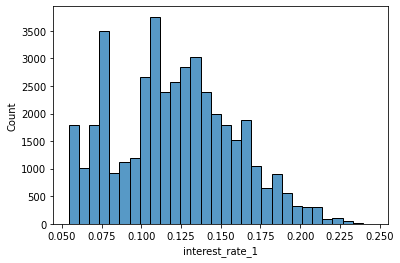

In [23]:
def hist_plot(df,column,bins):
  sns.histplot(data=df, x=column, bins=bins)

hist_plot(loans,"interest_rate_1",30)

## 2. clalculate the change in fico scores: last_fico_range_high last_fico_range_low



---
so we could simply just subtract high from low scores, the problem is that some folks only have a high score and low score is 0 or worse null. here we want to apply some logic

- if both scores not 0 then subtract
- else if either score is 0 return 0

## Row-wise operations

the apply() method with axis=1 is used to apply a function to each row of a DataFrame. Here are some key points to keep in mind when using apply() with axis=1:

- When using apply() with axis=1, the function is applied to each row of the DataFrame, and the result is returned as a Series or scalar value.
- The function passed to apply() must take a row of the DataFrame as input and return a Series or scalar value. The function can access and modify the values in the row as needed.
- When using apply() with axis=1, the function is called once for each row of the DataFrame. This can be slow for large DataFrames, so it is important to optimize the function as much as possible.

In [24]:
# Define the function
def diff_if_not_zero(row):
  # notice the key word 'row' this allows us to do funky stuff with the row. 
    if row['fico_range_low'] != 0 and row['fico_range_high'] != 0:
        return row['fico_range_high'] - row['fico_range_low']
    else:
        return 0

# notice axis = 1 we send in the ROW to the function
loans["fico_range_diff"] = loans.apply(diff_if_not_zero, axis=1)

loans[['fico_range_low', 'fico_range_high','fico_range_diff']].head(10)


,fico_range_low,fico_range_high,fico_range_diff
0,735.0,739.0,4.0
1,740.0,744.0,4.0
2,735.0,739.0,4.0
3,690.0,694.0,4.0
4,695.0,699.0,4.0
5,730.0,734.0,4.0
6,690.0,694.0,4.0
7,660.0,664.0,4.0
8,675.0,679.0,4.0
9,725.0,729.0,4.0


## 3. calculate monthly payment pct of monthly income


---

To do this we need to perform a few things. 
1. deal with `term` as it is a string ex. "36 months". we need to extract the 36 as a number to caluclate a monthly payment. 
2. take the `interest_rate_1` column we created above, use the `funded_amnt`and clauclate the `monthly_payment_amnt`

> M = P * (r * (1 + r)^n) / ((1 + r)^n - 1)
> Where:
  - `M` is the monthly payment
  - `P` is the principal amount (the amount borrowed)
  - `r` is the monthly interest rate (the annual interest rate divided by 12)
  - `n` is the number of monthly payments


3. finally we take the  `monthly_payment_amnt` divided by (`annual_inc` divided by 12) to get the `pct_of_monthly_income`


### ABOUT Try and Except: 


---


`try` and `except` are used to handle exceptions (errors) that may occur during the execution of a program.

- The `try` statement is used to define a block of code that may raise an exception. If an exception occurs in the try block, the interpreter stops executing the block and jumps to the except block.

- The `except` statement is used to handle the exception raised by the try block. You can specify the type of exception that you want to handle, or use a general except block to handle any type of exception.


In [25]:
def calc_pct_income(row):
    
    try:
      # remove the word "months" from the term
      months = int(str(row["term"]).replace("months", "").strip())
      
      # calculate the monthly interest rate 
      monthly_rate = row["interest_rate_1"] / 12 
    
      # calculate the monthly payment using the formula
      numerator = row["loan_amnt"] * monthly_rate * (1 + monthly_rate) ** months
      denominator = ((1 + monthly_rate) ** months) - 1
      monthly_payment_amnt = numerator / denominator

      # calculate the payment as a percentage of monthly income
      pct_of_monthly_income = monthly_payment_amnt / (row["annual_inc"] / 12)
      # use soemthing like this to debug what's going on in the function
      print("pmnt:{}, inc:{}, pct: {:.4f}".format(monthly_payment_amnt,row["annual_inc"] / 12 ,pct_of_monthly_income) )
    except:
      pct_of_monthly_income = -1.0
    
    return pct_of_monthly_income

# test the function by applying it to a few rows
loans.head().apply(calc_pct_income, axis=1)


pmnt:162.86609421816107, inc:2000.0, pct: 0.0814
pmnt:59.82972813245499, inc:2500.0, pct: 0.0239
pmnt:84.32949153721594, inc:1021.0, pct: 0.0826
pmnt:339.30450748784284, inc:4100.0, pct: 0.0828
pmnt:67.78408826609534, inc:6666.666666666667, pct: 0.0102


0    0.081433
1    0.023932
2    0.082595
3    0.082757
4    0.010168
dtype: float64

In [26]:
def calc_pct_income(row):
    
    try:
      # remove the word "months" from the term
      months = int(str(row["term"]).replace("months", "").strip())
      
      # calculate the monthly interest rate 
      monthly_rate = row["interest_rate_1"] / 12 
    
      # calculate the monthly payment using the formula
      numerator = row["loan_amnt"] * monthly_rate * (1 + monthly_rate) ** months
      denominator = ((1 + monthly_rate) ** months) - 1
      monthly_payment_amnt = numerator / denominator

      # calculate the payment as a percentage of monthly income
      pct_of_monthly_income = monthly_payment_amnt / (row["annual_inc"] / 12)
    except:
      # why -1? maybe shoudl be 0
      pct_of_monthly_income = -1.0
    
    return pct_of_monthly_income


loans['pct_of_monthly_income'] = loans.apply(calc_pct_income, axis=1)


### Finally lets look at a Histogram of our new column. 


---




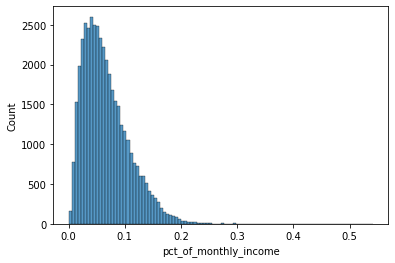

In [27]:
hist_plot(loans.query('pct_of_monthly_income > 0'),"pct_of_monthly_income",100)